# Installing required packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Loading

In [5]:
data = pd.read_csv('/content/drive/MyDrive/default of credit card clients.csv')

In [6]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
data.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

# columns resetting

In [8]:
# cleaning and resetiing the names of the attributes
data.columns = data.iloc[0]
data = data.drop(index = 0)
data.reset_index(inplace = True)

# Anomalies identification and elimination

In [9]:
# null values identification
data.isnull().sum()

0
index                         0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# Descriptive analysis

In [10]:
!pip install datatile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 4.9 MB/s 


In [11]:
from datatile.summary.df import DataFrameSummary
ddf = DataFrameSummary(data)

In [12]:
ddf.columns_stats

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
counts,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
uniques,30000,30000,81,2,7,4,56,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,unique,categorical,bool,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,bool


In [13]:
ddf.columns_types

categorical    22
bool            2
numeric         1
unique          1
Name: types, dtype: int64

In [14]:
data.dtypes

0
index                          int64
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [15]:
data.columns

Index(['index', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [16]:
# changing the datatypes of the attributes
data[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 
      'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
      'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = data[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3',
                                                                                       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                                                                       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                                                                                       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].apply(pd.to_numeric)

In [17]:
# calculating the overall mean of bill amount of the customers
data['bill'] = data[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis = 1)
data['payment'] = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis = 1)

index            AxesSubplot(0.125,0.71587;0.110714x0.16413)
LIMIT_BAL     AxesSubplot(0.257857,0.71587;0.110714x0.16413)
BILL_AMT1     AxesSubplot(0.390714,0.71587;0.110714x0.16413)
BILL_AMT2     AxesSubplot(0.523571,0.71587;0.110714x0.16413)
BILL_AMT3     AxesSubplot(0.656429,0.71587;0.110714x0.16413)
BILL_AMT4     AxesSubplot(0.789286,0.71587;0.110714x0.16413)
BILL_AMT5       AxesSubplot(0.125,0.518913;0.110714x0.16413)
BILL_AMT6    AxesSubplot(0.257857,0.518913;0.110714x0.16413)
PAY_AMT1     AxesSubplot(0.390714,0.518913;0.110714x0.16413)
PAY_AMT2     AxesSubplot(0.523571,0.518913;0.110714x0.16413)
PAY_AMT3     AxesSubplot(0.656429,0.518913;0.110714x0.16413)
PAY_AMT4     AxesSubplot(0.789286,0.518913;0.110714x0.16413)
PAY_AMT5        AxesSubplot(0.125,0.321957;0.110714x0.16413)
PAY_AMT6     AxesSubplot(0.257857,0.321957;0.110714x0.16413)
bill         AxesSubplot(0.390714,0.321957;0.110714x0.16413)
payment      AxesSubplot(0.523571,0.321957;0.110714x0.16413)
dtype: object

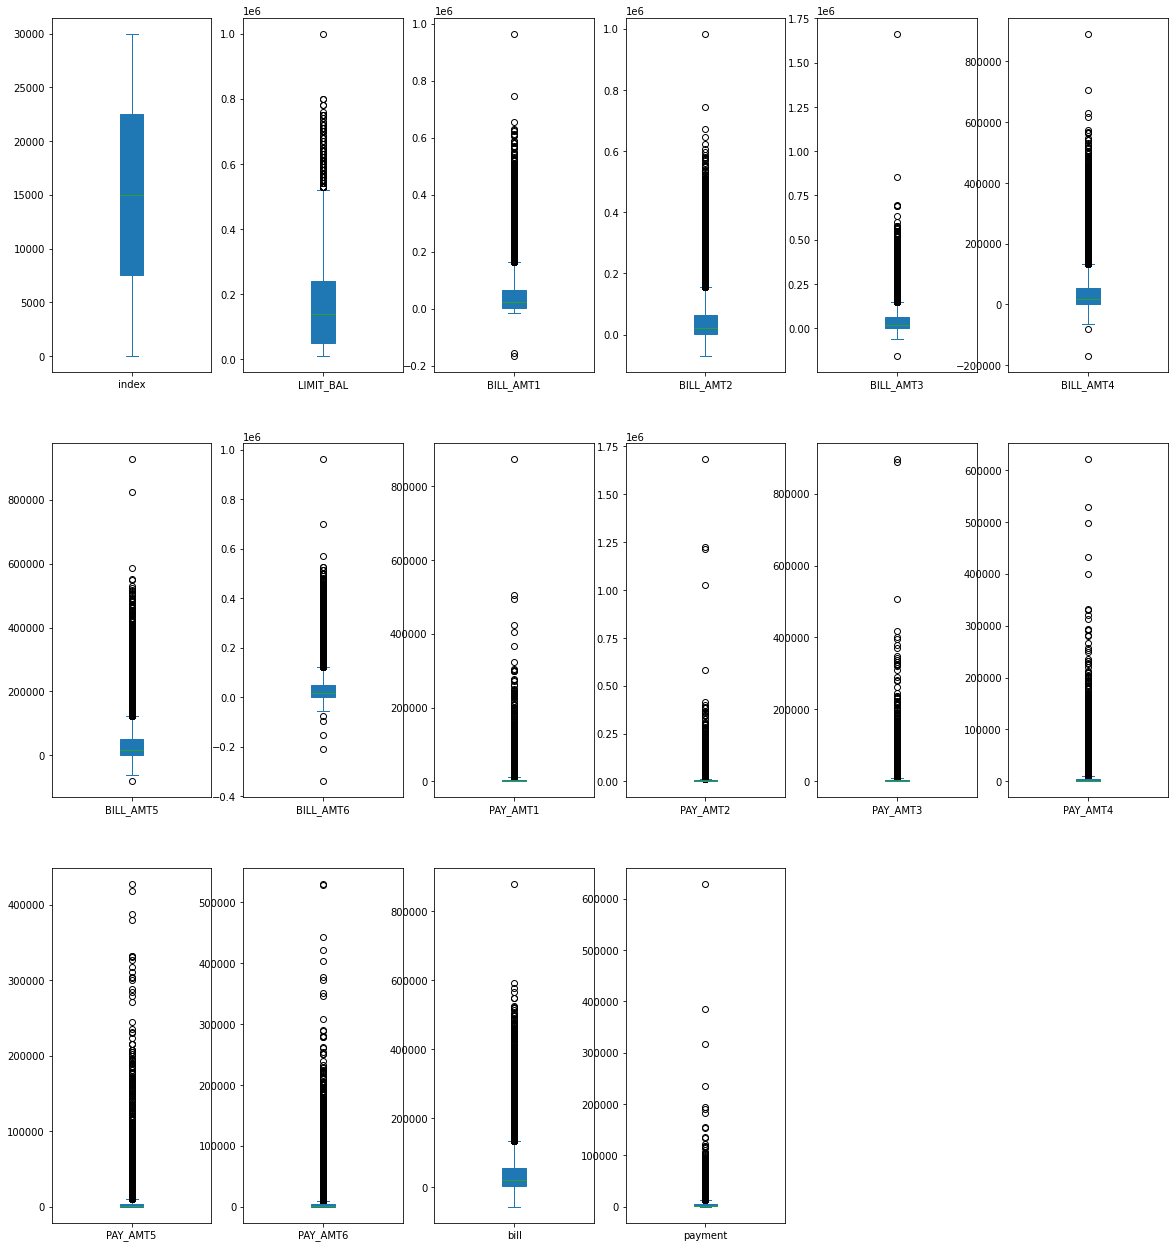

In [18]:
data.plot(subplots = True, kind = 'box', layout = (4,6), patch_artist = True, figsize = (20,30))


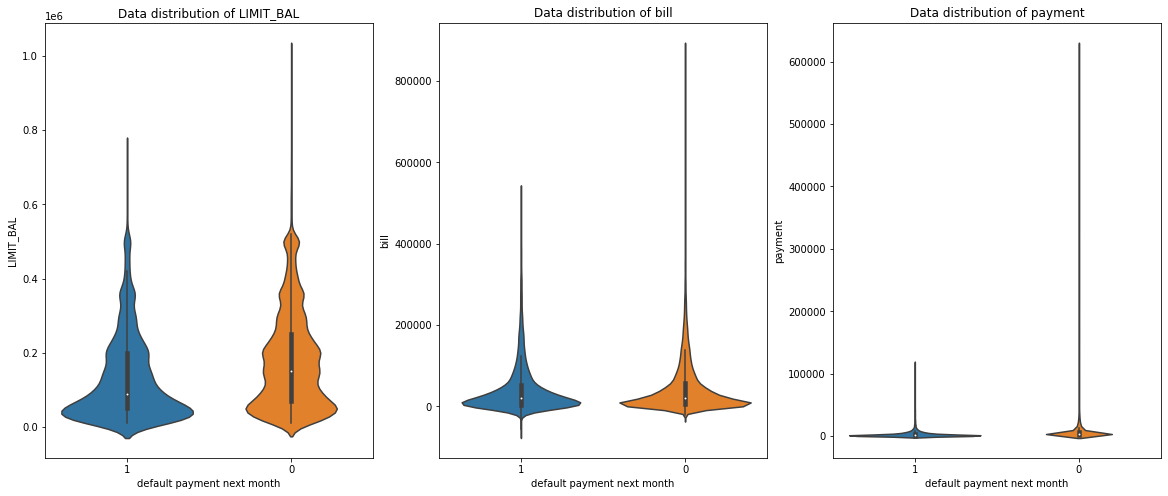

In [19]:
# identifying outliers in most significant attributes of the dataset
fig, ax = plt.subplots(1,3,figsize = (20, 8))
col = ['LIMIT_BAL','bill', 'payment']
for i in range(3):
  sns.violinplot(x=data['default payment next month'], y = data[col[i]], ax=ax[i])
  ax[i].set_title('Data distribution of '+col[i])

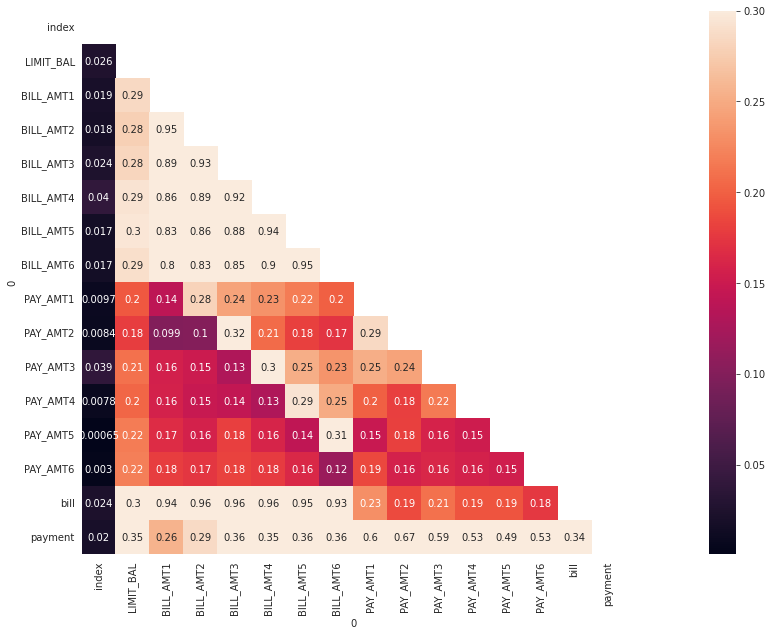

In [20]:
# Heatmap
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  af, ax = plt.subplots(figsize=(30, 10))
  ax = sns.heatmap(corr,annot=True, mask=mask, vmax=.3, square=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b5d949850>,
      dtype=object)

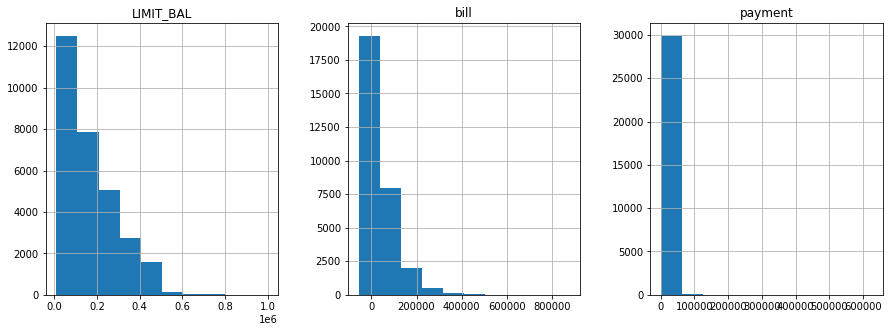

In [21]:
# Plotting histogram to analyze the values of the attributes
data[['LIMIT_BAL', 'bill', 'payment']].hist(figsize=(15,5),layout=(1,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b5d5b06d0>,
      dtype=object)

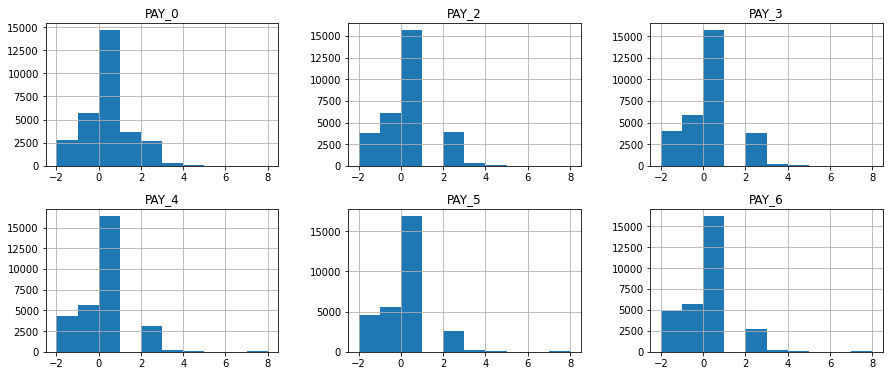

In [22]:
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(pd.to_numeric)
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].hist(figsize=(15,30),layout=(9,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b5cca2a10>,
      dtype=object)

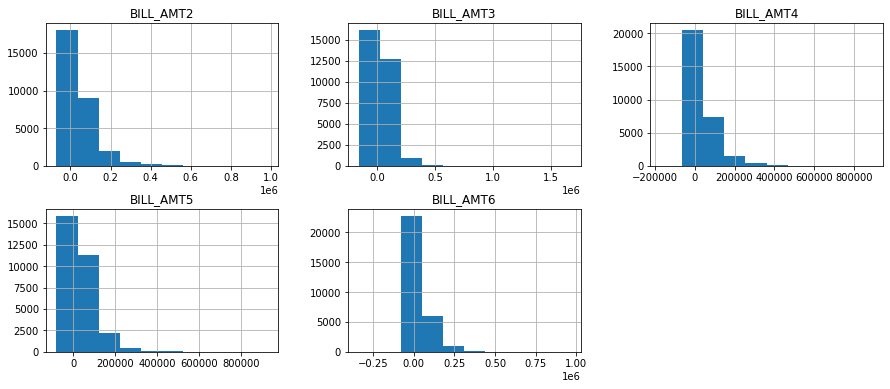

In [23]:
data[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']] = data[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(pd.to_numeric)
data[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].hist(figsize=(15,30),layout=(9,3))

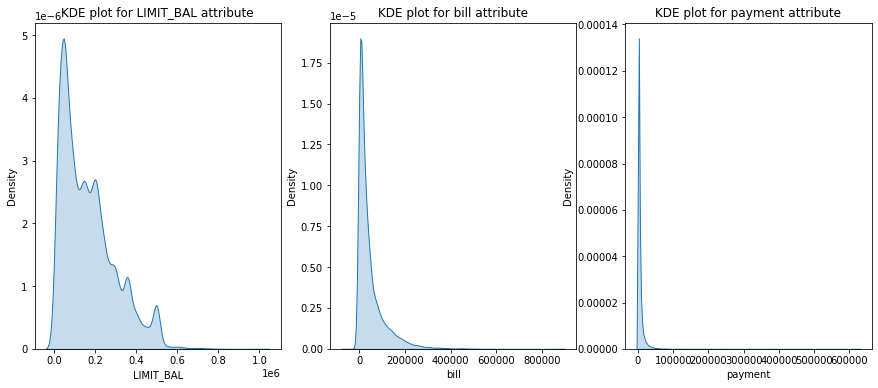

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (15, 6))
for i in range(3):
  sns.kdeplot(data[col[i]], ax = ax[i], shade = True)
  ax[i].set_title('KDE plot for '+col[i] + ' attribute')

# Visualizing the impact of categorical values on target values

In [25]:
data.head()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,bill,payment
0,1,1,20000,2,2,1,24,2,2,-1,...,0,0,689,0,0,0,0,1,1284.000000,114.833333
1,2,2,120000,2,2,2,26,-1,2,0,...,3261,0,1000,1000,1000,0,2000,1,2846.166667,833.333333
2,3,3,90000,2,2,2,34,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,16942.166667,1836.333333
3,4,4,50000,2,2,1,37,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,38555.666667,1398.000000
4,5,5,50000,1,2,1,57,-1,0,-1,...,19131,2000,36681,10000,9000,689,679,0,18223.166667,9841.500000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution of data between bill and payments')

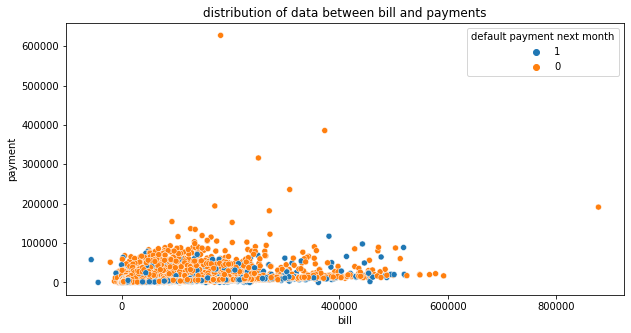

In [26]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data['bill'], data['payment'], hue = data['default payment next month'])
plt.title('distribution of data between bill and payments')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Default payment with respect to gender')

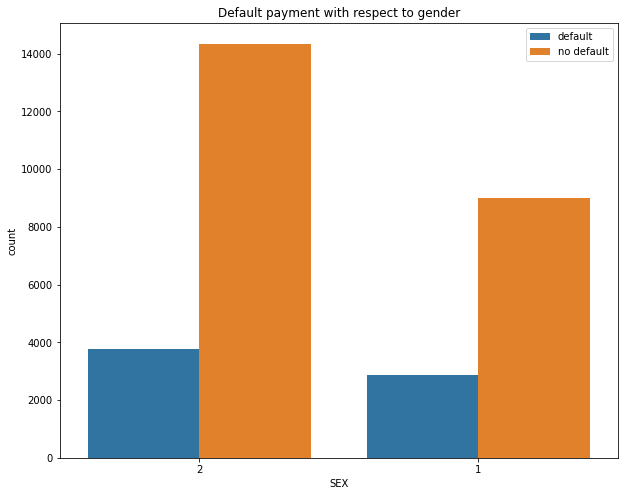

In [27]:
# analysis the default payments in different genders
plt.figure(figsize = (10, 8))
sns.countplot(data['SEX'], hue = data['default payment next month'])
plt.legend(['default', 'no default'])
plt.title('Default payment with respect to gender')

more number of females are not defaulted on their payment compared to men. 
1) 22.2% females are defaulted on the payments
2) 30.76%m males are defaulted on their payments

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


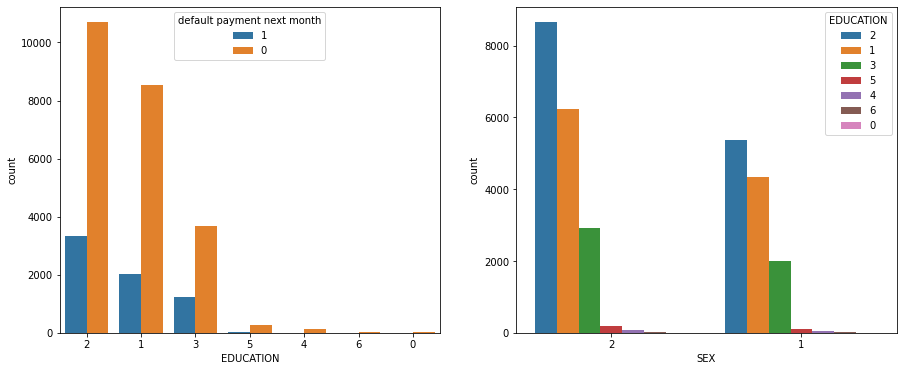

In [28]:

fig, axis = plt.subplots(1,2, figsize = (15,6))
sns.countplot(data['EDUCATION'], hue = data['default payment next month'], ax = axis[0])
sns.countplot(data['SEX'], hue = data['EDUCATION'], ax = axis[1])

{1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'} in Education attribute and 1:male and 2: female in SEX attribute. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Default payment with respect to relationship')

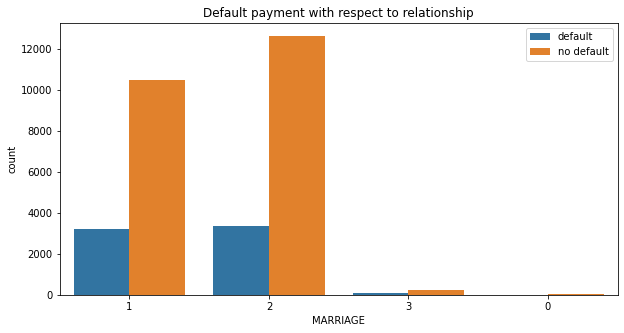

In [29]:
# analysis the default payments with respect to MARRIAGE.
plt.figure(figsize = (10, 5))
sns.countplot(data['MARRIAGE'], hue = data['default payment next month'])
plt.legend(['default', 'no default'])
plt.title('Default payment with respect to relationship')

(1 = married; 2 = single; 3 = others)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of target value')

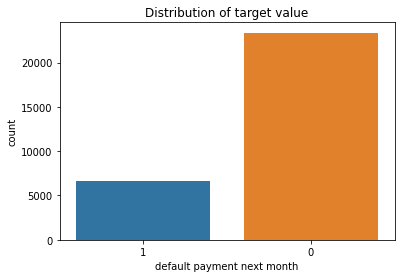

In [30]:
sns.countplot(data['default payment next month'])
plt.title('Distribution of target value')

# Feature and Target Selection 

In [31]:
features = data.drop(columns = ['index', 'ID', 'default payment next month'])
target = data['default payment next month']

# Dealing with imbalance using smote

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
s = SMOTE()
features1, target1 = s.fit_resample(features, target)

# Data Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(features1)
feature = scale.fit_transform(features1)

# PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=features.shape[1])

In [37]:
pcomp = pca.fit_transform(feature)

In [38]:
# setting column names
col = [chr(i) for i in range(97, 97+25)]

In [39]:
# Data frame prepartion using principal components
dataframe = pd.DataFrame(pcomp, columns = col)
dataframe['target'] = target.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
dataframe.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,target
0,-2.203200,-0.319381,-0.575693,-0.149760,1.250253,0.243061,-0.557502,-0.122378,-0.170130,-0.097425,...,-0.073923,-0.845893,0.535523,-0.026259,0.023615,0.015584,0.016204,-0.000018,3.853912e-07,1.0
1,-1.402713,-1.584251,0.632961,-1.205911,0.893134,-0.273296,0.074990,0.022950,-0.184830,0.120346,...,0.446128,-0.090205,0.784457,-0.101268,0.016716,0.002256,0.012995,-0.000015,6.125416e-07,1.0
2,-1.196157,-0.582383,0.110647,-0.688813,0.844386,0.045345,-0.128094,0.173219,-0.126727,0.081804,...,0.029131,0.005278,0.001355,0.114121,-0.082970,-0.038318,-0.066684,-0.000013,3.241664e-07,0.0
3,-0.456708,-0.501161,-0.449700,0.740648,0.987305,-0.363067,0.180418,0.085616,0.106396,-0.055842,...,0.201040,0.027041,-0.003895,0.013901,0.138690,0.027418,-0.050627,-0.000016,3.520421e-07,0.0
4,-0.831402,0.632186,1.063064,2.545313,-1.082196,0.613859,0.956547,-0.243097,0.540985,-0.463239,...,0.152451,-0.542529,0.204842,-0.030192,0.079591,-0.024408,-0.012904,-0.000015,3.601209e-07,0.0


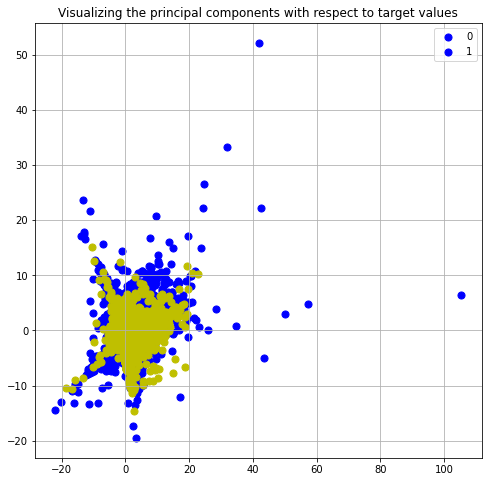

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
target_ = [0,1]
color = ['b', 'y']
for i,j in zip(target_, color):
  index = dataframe['target'] == i
  ax.scatter(dataframe.loc[index, 'a'], dataframe.loc[index, 'b'], color = j, s = 50)
  ax.scatter(dataframe.loc[index, 'c'], dataframe.loc[index, 'd'], color = j, s = 50)
  ax.scatter(dataframe.loc[index, 'e'], dataframe.loc[index, 'f'], color = j, s = 50)
  ax.scatter(dataframe.loc[index, 'g'], dataframe.loc[index, 'h'], color = j, s = 50)
ax.legend(target_)
ax.set_title('Visualizing the principal components with respect to target values')
ax.grid()

# Data Splitting

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target1, test_size = 0.25)

# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(xtrain, ytrain)
pred1 = random.predict(xtest)

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(pred1, ytest)

0.8762198253723678

In [45]:
print(classification_report(pred1, ytest))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      6255
           1       0.84      0.90      0.87      5427

    accuracy                           0.88     11682
   macro avg       0.88      0.88      0.88     11682
weighted avg       0.88      0.88      0.88     11682



In [46]:
print(confusion_matrix(pred1, ytest))

[[5326  929]
 [ 517 4910]]


# hyperparameter tunning of random forest classifier

In [47]:
from sklearn.model_selection import GridSearchCV
n_estimators = [i for i in range(200, 500, 100)]
iter = [x for x in range(100, 200, 10)]
grid = {
    'n_estimators':n_estimators,
}

In [48]:
tuned_random = RandomForestClassifier()
rf_random = GridSearchCV(estimator = tuned_random, param_grid = grid)
rf_random.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [200, 300, 400]})

In [49]:
best = rf_random.best_params_

In [50]:
best

{'n_estimators': 400}

In [51]:
predictions = rf_random.predict(xtest)

In [52]:
accuracy_score(predictions, ytest)

0.8769902413970211

#DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(xtrain, ytrain)
pred2 = tree.predict(xtest)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(pred2, ytest)

0.8049991439821949

In [55]:
print(classification_report(pred2, ytest))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      5745
           1       0.81      0.80      0.81      5937

    accuracy                           0.80     11682
   macro avg       0.81      0.81      0.80     11682
weighted avg       0.81      0.80      0.81     11682



In [56]:
print(confusion_matrix(pred2, ytest))

[[4655 1090]
 [1188 4749]]


# Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier()

In [58]:
gradient.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [59]:
gra_pred = gradient.predict(xtest)

In [60]:
accuracy_score(gra_pred, ytest)

0.8576442390001712

In [61]:
print(classification_report(gra_pred, ytest))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      6638
           1       0.79      0.91      0.85      5044

    accuracy                           0.86     11682
   macro avg       0.86      0.86      0.86     11682
weighted avg       0.87      0.86      0.86     11682



In [62]:
print(confusion_matrix(gra_pred, ytest))

[[5409 1229]
 [ 434 4610]]
